In [1]:
'''
select 
o.puserid,
o.amount as PlaceAmount,
o.merchant,
o.trans_date,
t.paymentamount as paymentamount,
m.noofinstallment,
m.installmenttype,
t.status_description
from tbl_orderdetails o
left join tbl_customeroffer_master m on o.puserid = m.cubsreferenceno 
join tbl_customeroffer_transactions t on m.customerofferid = t.customerofferid
'''

'\nselect \no.puserid,\no.amount as PlaceAmount,\no.merchant,\no.trans_date,\nt.paymentamount as paymentamount,\nm.noofinstallment,\nm.installmenttype,\nt.status_description\nfrom tbl_orderdetails o\nleft join tbl_customeroffer_master m on o.puserid = m.cubsreferenceno \njoin tbl_customeroffer_transactions t on m.customerofferid = t.customerofferid\n'

In [2]:
'''
DECLARE @EmailStartDate DATETIME
DECLARE @EmailEndDate DATETIME

SET @EmailStartDate = '11/20/2007'
SET @EmailEndDate = '11/24/2021'


select 
mailpusheddate,
datepart(hh,mailpusheddate) as hour,
datepart(dw,mailpusheddate) as dayOfWeek,
datepart(dd,mailpusheddate) as dayOfMonth,
datepart(dy,mailpusheddate) as dayOfYear,
datediff(dd,u.placedate,mailpusheddate) as daysAfterTrigger,
u.puserid,
EmailTemplateID,
count(distinct e.sno) as EmailsSent,
count(distinct(case when t.type in ('open','initial_open') then t.transmission_id end)) as Opened,
count(distinct(case when t.type in ('click') then t.transmission_id end)) as Clicked
from
tbl_emailsentlog e with (nolock) 
join accounts u with (nolock) on e.cubsreferenceno=u.puserid
join tbl_messageevent m with (nolock) on e.transmissionid=m.transmission_id 
left join tbl_trackevent t with (nolock) on e.transmissionid=t.transmission_id
where
testaccountflag is null
and mailpusheddate>=@EmailStartDate
and mailpusheddate<@EmailEndDate
group by 
mailpusheddate,
datepart(hh,mailpusheddate),
datepart(dw,mailpusheddate),
datepart(dd,mailpusheddate),
datepart(dy,mailpusheddate),
datediff(dd,u.placedate,mailpusheddate),
u.puserid,
EmailTemplateID 
'''

"\nDECLARE @EmailStartDate DATETIME\nDECLARE @EmailEndDate DATETIME\n\nSET @EmailStartDate = '11/20/2007'\nSET @EmailEndDate = '11/24/2021'\n\n\nselect \nmailpusheddate,\ndatepart(hh,mailpusheddate) as hour,\ndatepart(dw,mailpusheddate) as dayOfWeek,\ndatepart(dd,mailpusheddate) as dayOfMonth,\ndatepart(dy,mailpusheddate) as dayOfYear,\ndatediff(dd,u.placedate,mailpusheddate) as daysAfterTrigger,\nu.puserid,\nEmailTemplateID,\ncount(distinct e.sno) as EmailsSent,\ncount(distinct(case when t.type in ('open','initial_open') then t.transmission_id end)) as Opened,\ncount(distinct(case when t.type in ('click') then t.transmission_id end)) as Clicked\nfrom\ntbl_emailsentlog e with (nolock) \njoin accounts u with (nolock) on e.cubsreferenceno=u.puserid\njoin tbl_messageevent m with (nolock) on e.transmissionid=m.transmission_id \nleft join tbl_trackevent t with (nolock) on e.transmissionid=t.transmission_id\nwhere\ntestaccountflag is null\nand mailpusheddate>=@EmailStartDate\nand mailpushedd

In [3]:
'''select emailtemplateid,daysaftertrigger from emailstrategydetails where emailstrategyid=101;'''

'select emailtemplateid,daysaftertrigger from emailstrategydetails where emailstrategyid=101;'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from datetime import datetime as dt
import datetime
from dateutil import parser
import seaborn as sns
from scipy.optimize import curve_fit

In [5]:
names = ['date','hour','weekDay','monthDay','yearDay','daysAfterTrigger','puserid','emailtemplateid','emailssent','opened','clicked']

In [6]:
df = pd.read_csv(r'C:\Users\LG735620\Desktop\Data Science\Datasets\klarna.txt',sep='\t',names = names)
text = pd.read_excel(r'C:\Users\LG735620\Desktop\Data Science\Datasets\klarnaText.xlsx')
cycle = pd.read_csv(r'C:\Users\LG735620\Desktop\Data Science\Datasets\klarnaLifeCycle.txt',sep='\t',names = ['emailtemplateid','daysAfterTrigger'])

In [7]:
df = df.drop(df[df['daysAfterTrigger'] < 0].index)
df

,date,hour,weekDay,monthDay,yearDay,daysAfterTrigger,puserid,emailtemplateid,emailssent,opened,clicked
0,2021-05-10 11:07:49.330,11,2,10,130,0,1000,KIDL01,1,1,1
1,2021-05-10 11:07:49.830,11,2,10,130,0,1001,KIDL01,1,1,1
2,2021-05-10 11:07:50.333,11,2,10,130,0,1003,KIDL01,1,0,0
3,2021-05-10 11:07:50.890,11,2,10,130,0,1004,KIDL01,1,0,0
4,2021-05-10 11:07:51.373,11,2,10,130,0,1005,KIDL01,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
3726216,2021-11-23 12:22:07.330,12,3,23,327,25,150373,KEMS14,1,0,0
3726217,2021-11-23 12:22:07.773,12,3,23,327,25,150608,KEMS14,1,0,0
3726218,2021-11-23 12:22:08.247,12,3,23,327,25,150632,KEMS14,1,0,0
3726219,2021-11-23 12:22:09.233,12,3,23,327,4,173906,KSIE03,1,0,0


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
hour,3726220.0,12.223862,2.382082,0.0,11.0,12.0,14.0,23.0
weekDay,3726220.0,4.182306,1.906150,1.0,2.0,4.0,6.0,7.0
monthDay,3726220.0,15.906670,8.473911,1.0,9.0,16.0,23.0,31.0
yearDay,3726220.0,266.391044,45.198532,130.0,235.0,277.0,304.0,327.0
daysAfterTrigger,3726220.0,58.148567,44.450969,0.0,21.0,48.0,87.0,197.0
puserid,3726220.0,59096.274851,42358.749721,1000.0,23548.0,50498.0,87959.0,178779.0
emailssent,3726220.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
opened,3726220.0,0.317733,0.465595,0.0,0.0,0.0,1.0,1.0
clicked,3726220.0,0.016535,0.127520,0.0,0.0,0.0,0.0,1.0


In [9]:
triggers = pd.DataFrame()
uniqueDays = list(df.daysAfterTrigger.unique())
size = [0 for i in enumerate(uniqueDays)]
triggers['support'],triggers['openRate'],triggers['clickRate'] =size,size,size
triggers.index = uniqueDays

In [10]:
support,oR,cR=[],[],[]
for index, row in triggers.iterrows():
    quant = int(len(df[(df['daysAfterTrigger']==index)]))
    support.append(quant)
    oR.append((len(df[(df['daysAfterTrigger']==index) & (df['opened']==1)])) / (quant))
    cR.append((len(df[(df['daysAfterTrigger']==index) & (df['clicked']==1)])) / (quant))

In [11]:
triggers['support'],triggers['openRate'],triggers['clickRate'], =support,oR,cR
triggers = triggers.drop(triggers[(triggers.support < 10000)].index)
triggers.head()

,support,openRate,clickRate
0,151848,0.425162,0.061963
1,15202,0.374753,0.056177
4,71575,0.440014,0.053580
6,65088,0.370944,0.061547
7,86209,0.392395,0.031609


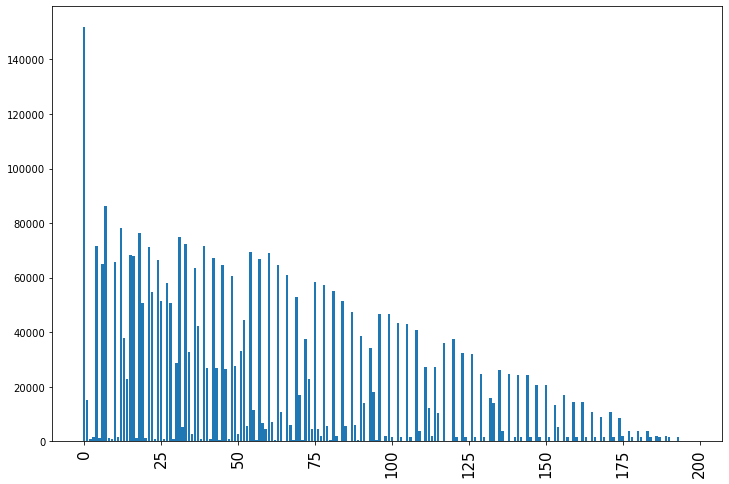

In [85]:
days = dict(sorted(df.daysAfterTrigger.value_counts().to_dict().items()))

D = days
plt.figure(figsize=(12,8))
plt.bar(D.keys(),D.values())
plt.xticks(fontsize = 15,rotation = 90)
plt.show()

In [12]:
def func(x, a, b,c):
    return a*np.log2(b+x)+c

<ipython-input-12-5e56b425f3e0>:2: RuntimeWarning: invalid value encountered in log2
  return a*np.log2(b+x)+c


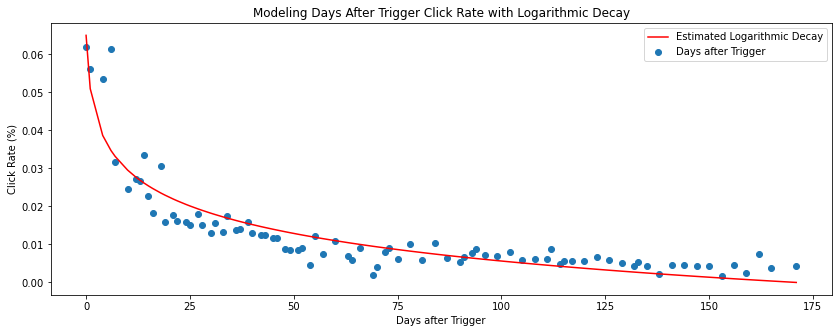

In [13]:
x,y = list(triggers.index),list(triggers.clickRate)
popt, pcov = curve_fit(func, x, y)

plt.figure(figsize=(14,5))
plt.scatter(x, y, label="Days after Trigger")
plt.plot(x, func(x, *popt), 'r-', label="Estimated Logarithmic Decay")
plt.legend()
plt.xlabel('Days after Trigger')
plt.ylabel('Click Rate (%)')
plt.title('Modeling Days After Trigger Click Rate with Logarithmic Decay')
plt.show()

<ipython-input-12-5e56b425f3e0>:2: RuntimeWarning: invalid value encountered in log2
  return a*np.log2(b+x)+c


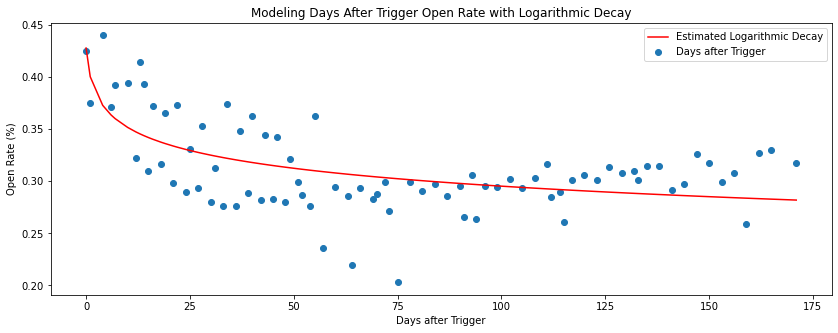

In [14]:
x,y = list(triggers.index),list(triggers.openRate)
popt, pcov = curve_fit(func, x, y)

plt.figure(figsize=(14,5))
plt.scatter(x, y, label="Days after Trigger")
plt.plot(x, func(x, *popt), 'r-', label="Estimated Logarithmic Decay")
plt.legend()
plt.xlabel('Days after Trigger')
plt.ylabel('Open Rate (%)')
plt.title('Modeling Days After Trigger Open Rate with Logarithmic Decay')
plt.show()

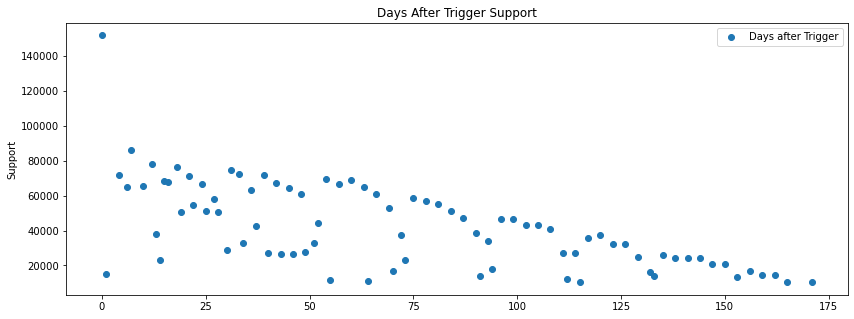

In [15]:
x,y = list(triggers.index),list(triggers.support)

plt.figure(figsize=(14,5))
plt.scatter(x, y, label="Days after Trigger")
plt.legend()
plt.ylabel('Support')
plt.title('Days After Trigger Support')
plt.show()

In [16]:
metrics = pd.DataFrame()
templates = list(df.emailtemplateid.unique())
size = [0 for i in enumerate(templates)]
metrics['support'],metrics['openRate'],metrics['clickRate'] =size,size,size
metrics.index = templates

In [17]:
support,oR,cR=[],[],[]
for index, row in metrics.iterrows():
    quant = int(len(df[(df['emailtemplateid']==index)]))
    support.append(quant)
    oR.append((len(df[(df['emailtemplateid']==index) & (df['opened']==1)])) / (quant))
    cR.append((len(df[(df['emailtemplateid']==index) & (df['clicked']==1)])) / (quant))

In [18]:
metrics['support'],metrics['openRate'],metrics['clickRate'], =support,oR,cR
metrics = metrics.drop(metrics[(metrics.support < 20000)].index)

In [19]:
metrics = pd.merge(metrics, text, left_index=True, right_on='emailtemplateID')

In [20]:
metrics.describe().T

,count,mean,std,min,25%,50%,75%,max
support,33.0,110945.030303,45181.694792,22528.000000,79668.000000,118118.000000,141914.000000,215241.000000
openRate,33.0,0.311392,0.055756,0.213712,0.289679,0.298134,0.308984,0.554155
clickRate,33.0,0.012486,0.013134,0.001189,0.006347,0.008529,0.011902,0.060277


In [21]:
for index,row in metrics.iterrows():
    if 'AG' in row.emailtemplateID or'thank you' in row.subjectline or'Congratulations' in row.bannertext or'completed' in row.bannertext or'update' in row.bannertext:
        print(index, row.subjectline,row.bannertext)
        metrics = metrics.drop([index])

91 {{FIRST_NM}}, thank you for your payment Congratulations, your balance is paid in full!


In [22]:
metrics['geometricMean'] = (metrics['openRate']*metrics['clickRate'])**.5

In [23]:
metrics['supportRank'] = metrics['support'].rank(ascending=False)

In [24]:
metrics = metrics.sort_values(by=['geometricMean'],ascending = False)
metrics

,support,openRate,clickRate,emailtemplateID,subjectline,bannertext,geometricMean,supportRank
16,162733,0.412031,0.060277,KIDL01,"{{FIRST_NM}}, new information regarding your K...",Let’s work together to resolve your Klarna acc...,0.157594,4.0
33,151199,0.391319,0.055794,KSIE03,"{{FIRST_NM}}, options for your Klarna account",We're here to help you put this debt behind you,0.147761,5.0
13,132850,0.345231,0.028054,KEMS15,"{{FIRST_NM}}, you have options",Select a repayment plan,0.098413,13.0
11,143645,0.352591,0.025410,KEMS11,"{{FIRST_NM}}, you have options",We're here to help find a solution to resolve ...,0.094654,7.0
9,141647,0.340678,0.022076,KEMS07,"{{FIRST_NM}}, customizable options available",Resolve your balance today,0.086723,10.0
30,179412,0.319042,0.013817,KNOA01,"{{FIRST_NM}}, check out your new offer",How can we help?,0.066395,2.0
5,137504,0.305162,0.012960,KEMS02,"{{FIRST_NM}}, Offers for you",Resolve your Klarna account today,0.062887,11.0
22,167151,0.308984,0.012169,KMMS08,"{{FIRST_NM}}, do any of these options work for...",You have options – select the one that works b...,0.061318,3.0
26,215241,0.309332,0.011587,KMMS17,"{{FIRST_NM}}, we want to hear from you","{{FIRST_NM}}, we're waiting for your reply",0.059869,1.0
20,141914,0.300513,0.011902,KMMS03,"{{FIRST_NM}}, check out options for your Klarn...",Check out your options to resolve your Klarna ...,0.059804,9.0


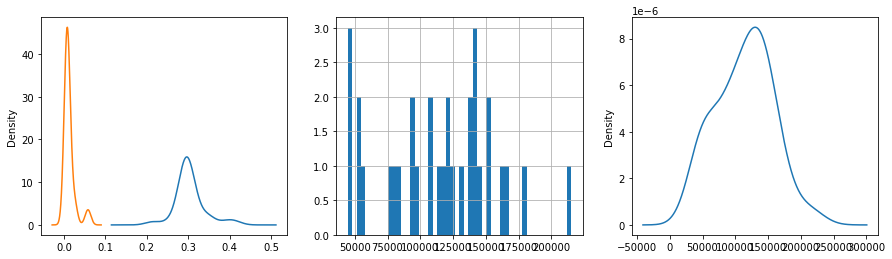

In [25]:
fig, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(15,4))
metrics.openRate.plot.density(ax=ax1)
metrics.clickRate.plot.density(ax=ax1)
metrics.support.hist(ax=ax2,bins=50)
metrics.support.plot.density(ax=ax3)
plt.show()

In [26]:
df['date'] = df['date'].apply(lambda x: parser.parse(x).replace(hour=0,minute=0, second=0, microsecond=0))

In [27]:
df.head()

,date,hour,weekDay,monthDay,yearDay,daysAfterTrigger,puserid,emailtemplateid,emailssent,opened,clicked
0,2021-05-10,11,2,10,130,0,1000,KIDL01,1,1,1
1,2021-05-10,11,2,10,130,0,1001,KIDL01,1,1,1
2,2021-05-10,11,2,10,130,0,1003,KIDL01,1,0,0
3,2021-05-10,11,2,10,130,0,1004,KIDL01,1,0,0
4,2021-05-10,11,2,10,130,0,1005,KIDL01,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
3726216,2021-11-23,12,3,23,327,25,150373,KEMS14,1,0,0
3726217,2021-11-23,12,3,23,327,25,150608,KEMS14,1,0,0
3726218,2021-11-23,12,3,23,327,25,150632,KEMS14,1,0,0
3726219,2021-11-23,12,3,23,327,4,173906,KSIE03,1,0,0


# Time for Time Series!!!

In [28]:
hourList = list(df.hour.unique())
hourList.sort()
print(*hourList)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23


In [29]:
hourlyOpenRates = []
hourlyClickRates = []
hourlyQuant = []

count = 0
for hour in hourList:
    quant = (len(df[(df['hour']==hour)]))
    valOpens = (len(df[(df['hour']==hour) & (df['opened']==1)])) / max(quant,0.000001)
    valClicks = (len(df[(df['hour']==hour) & (df['clicked']==1)])) / max(quant,0.000001)
    # add 0.2 to valClicks to get view opens and clicks across similar range
    hourlyOpenRates.append(valOpens)
    hourlyClickRates.append(valClicks)
    hourlyQuant.append(quant)
    count += 1
    if count % 1 == 0:
        print(100*(count/len(hourList)),' ',valOpens, ' ', valClicks, ' ',quant)

4.166666666666666   0.6694045174537988   0.12114989733059549   487
8.333333333333332   0.6811091854419411   0.12824956672443674   577
12.5   0.6666666666666666   0.10256410256410256   312
16.666666666666664   0.6122448979591837   0.1346938775510204   245
20.833333333333336   0.5580508474576271   0.015677966101694914   2360
25.0   0.5605150214592275   0.006330472103004292   9320
29.166666666666668   0.5524576027594136   0.008766887036504743   6958
33.33333333333333   0.5767991407089151   0.019763694951664877   4655
37.5   0.3776826814757762   0.028202571919077764   277847
41.66666666666667   0.31518111050469655   0.014991526154022923   348130
45.83333333333333   0.3615141839729847   0.023205955152329337   108679
50.0   0.29159198663537433   0.015407194984207288   591412
54.166666666666664   0.31840243747958213   0.018839463701155402   599964
58.333333333333336   0.30715556487563334   0.013021802217426891   591316
62.5   0.3089526828026252   0.014249123087037649   526278
66.6666666666666

In [30]:
hourlyMetrics = pd.DataFrame(data={'hour':hourList,'openRate':hourlyOpenRates,'clickRate':hourlyClickRates,'hourlyQuant':hourlyQuant})
hourlyMetrics

,hour,openRate,clickRate,hourlyQuant
0,0,0.669405,0.121150,487
1,1,0.681109,0.128250,577
2,2,0.666667,0.102564,312
3,3,0.612245,0.134694,245
4,4,0.558051,0.015678,2360
5,5,0.560515,0.006330,9320
6,6,0.552458,0.008767,6958
7,7,0.576799,0.019764,4655
8,8,0.377683,0.028203,277847
9,9,0.315181,0.014992,348130


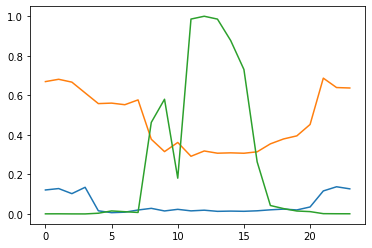

In [31]:
plt.plot(hourlyMetrics.clickRate)
plt.plot(hourlyMetrics.openRate)
plt.plot((hourlyMetrics.hourlyQuant-hourlyMetrics.hourlyQuant.min())/(hourlyMetrics.hourlyQuant.max()-hourlyMetrics.hourlyQuant.min()))

In [32]:
dateList = list(df.date.unique())

dailyOpenRates = []
dailyClickRates = []
dailyQuant = []

count = 0
for date in dateList:
    valOpens = (len(df[(df['date']==date) & (df['opened']==1)])) / (len(df[(df['date']==date)]))
    valClicks = (len(df[(df['date']==date) & (df['clicked']==1)])) / (len(df[(df['date']==date)]))
    quant = (len(df[(df['date']==date)]))
    # add 0.2 to valClicks to get view opens and clicks across similar range
    dailyOpenRates.append(valOpens)
    dailyClickRates.append(valClicks)
    dailyQuant.append(quant)
    count += 1
    if count % 20 == 0:
        print(100*(count/len(dateList)),' ',valOpens, ' ', valClicks, ' ',quant)

10.1010101010101   0.22105004906771344   0.019627085377821395   4076
20.2020202020202   0.32988072818581293   0.039077212806026364   12744
30.303030303030305   0.3157984193082349   0.03373842100790346   11767
40.4040404040404   0.26635552280356994   0.020797510849095226   12213
50.505050505050505   0.26821465428276575   0.01718266253869969   19380
60.60606060606061   0.5634328358208955   0.09328358208955224   268
70.70707070707071   0.6256684491978609   0.0374331550802139   187
80.8080808080808   0.34870794011561834   0.012994713177528533   40478
90.9090909090909   0.37228112089990545   0.011696779652580758   40182


In [33]:
metrics = pd.DataFrame(data={'date':dateList,'openRate':dailyOpenRates,'clickRate':dailyClickRates,'dailyQuant':dailyQuant})
metrics

,date,openRate,clickRate,dailyQuant
0,2021-05-10,0.305643,0.050113,2215
1,2021-05-11,0.785714,0.000000,14
2,2021-05-12,0.466667,0.000000,15
3,2021-05-13,0.346154,0.009615,104
4,2021-05-14,0.285714,0.000000,49
...,...,...,...,...
193,2021-11-19,0.391614,0.021556,37205
194,2021-11-20,0.362489,0.011155,46349
195,2021-11-21,0.333722,0.006457,52346
196,2021-11-22,0.334053,0.007303,27798


In [34]:
metrics.index = pd.to_datetime(metrics.date)
metrics

,date,openRate,clickRate,dailyQuant
date,,,,
2021-05-10,2021-05-10,0.305643,0.050113,2215
2021-05-11,2021-05-11,0.785714,0.000000,14
2021-05-12,2021-05-12,0.466667,0.000000,15
2021-05-13,2021-05-13,0.346154,0.009615,104
2021-05-14,2021-05-14,0.285714,0.000000,49
...,...,...,...,...
2021-11-19,2021-11-19,0.391614,0.021556,37205
2021-11-20,2021-11-20,0.362489,0.011155,46349
2021-11-21,2021-11-21,0.333722,0.006457,52346


In [35]:
data_7d_rol = metrics[metrics.columns].rolling(window = 7, center = True).mean()
data_365d_rol = metrics[metrics.columns].rolling(window = 31, center = True).mean()

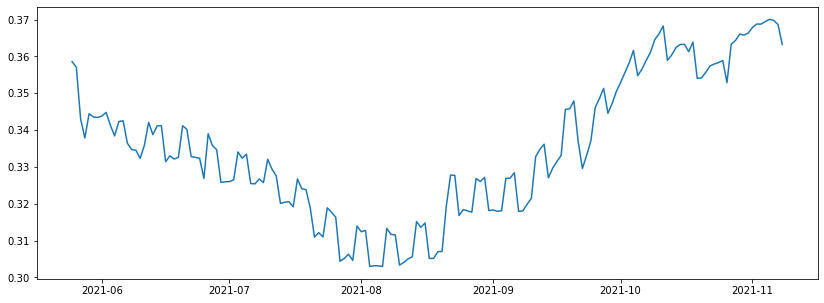

In [36]:
plt.figure(figsize=(14,5))
plt.plot(data_365d_rol['openRate'])

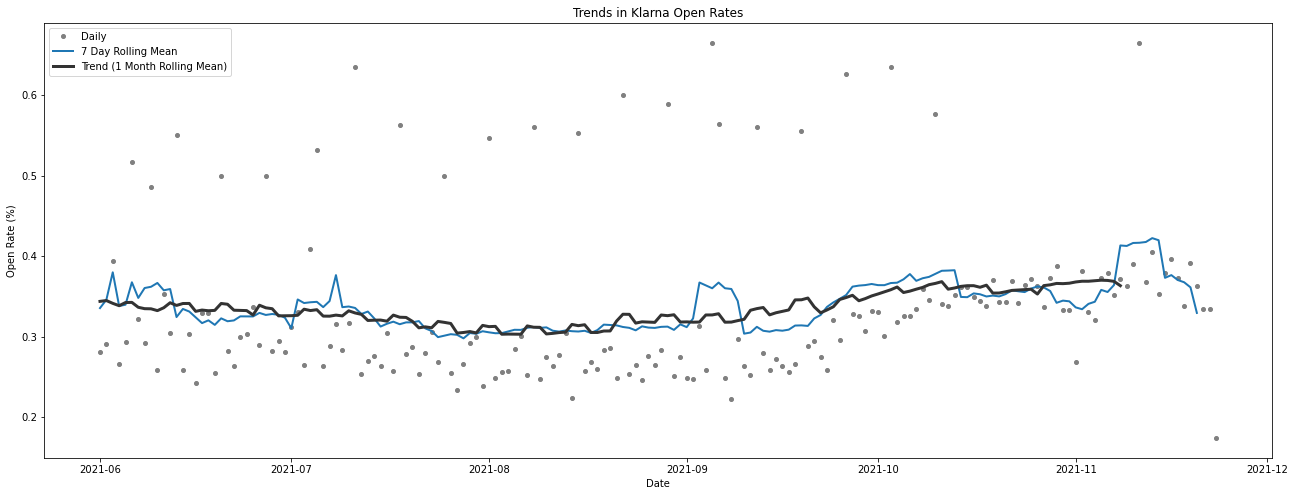

In [37]:
fig, ax = plt.subplots(figsize = (22,8))
# plotting daily data
ax.plot(metrics.iloc[22:]['openRate'], marker='.', markersize=8, color='0.5',linestyle='None', label='Daily')
# plotting 7-day rolling data
ax.plot(data_7d_rol.iloc[22:]['openRate'], linewidth=2, label='7 Day Rolling Mean')
# plotting annual rolling data
ax.plot(data_365d_rol.iloc[22:]['openRate'], color='0.2', linewidth=3, label='Trend (1 Month Rolling Mean)')
# Beautification of plot
#ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Open Rate (%)')
ax.set_title('Trends in Klarna Open Rates')
plt.show()

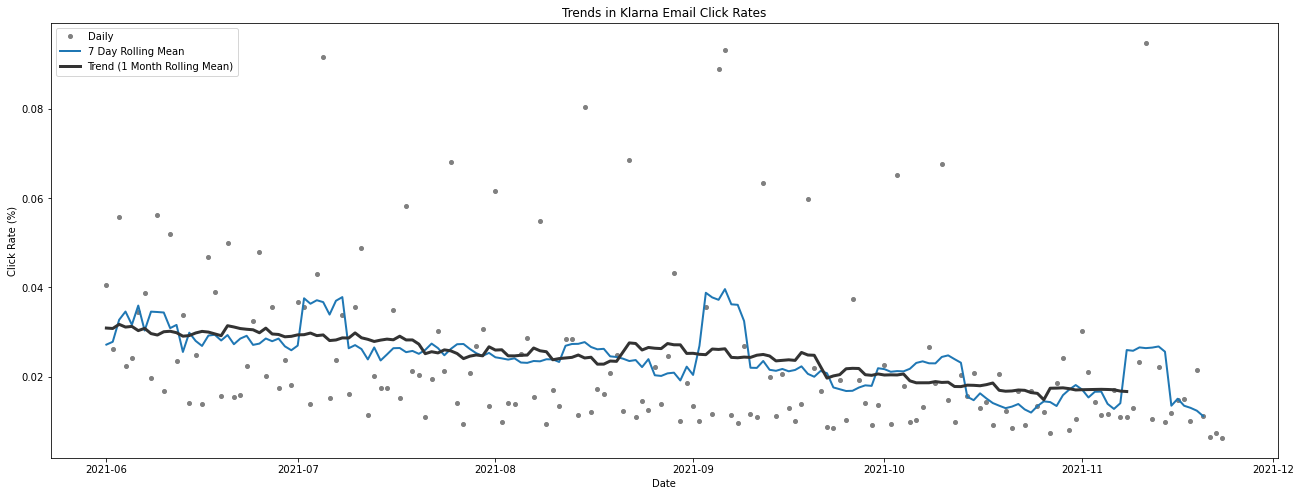

In [38]:
fig, ax = plt.subplots(figsize = (22,8))
# plotting daily data
ax.plot(metrics['clickRate'].iloc[22:], marker='.', markersize=8, color='0.5',linestyle='None', label='Daily')
# plotting 7-day rolling data
ax.plot(data_7d_rol['clickRate'].iloc[22:], linewidth=2, label='7 Day Rolling Mean')
# plotting annual rolling data
ax.plot(data_365d_rol['clickRate'].iloc[22:], color='0.2', linewidth=3, label='Trend (1 Month Rolling Mean)')
# Beautification of plot
#ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Click Rate (%)')
ax.set_title('Trends in Klarna Email Click Rates')
plt.show()

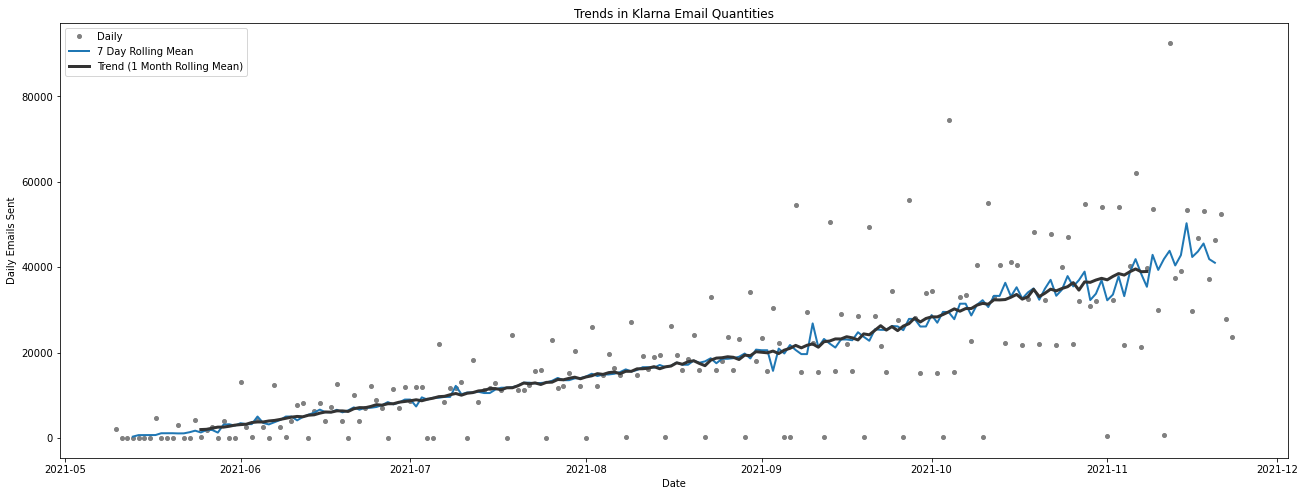

In [39]:
fig, ax = plt.subplots(figsize = (22,8))
# plotting daily data
ax.plot(metrics['dailyQuant'], marker='.', markersize=8, color='0.5',linestyle='None', label='Daily')
# plotting 7-day rolling data
ax.plot(data_7d_rol['dailyQuant'], linewidth=2, label='7 Day Rolling Mean')
# plotting annual rolling data
ax.plot(data_365d_rol['dailyQuant'], color='0.2', linewidth=3, label='Trend (1 Month Rolling Mean)')
# Beautification of plot
#ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Daily Emails Sent')
ax.set_title('Trends in Klarna Email Quantities')
plt.show()

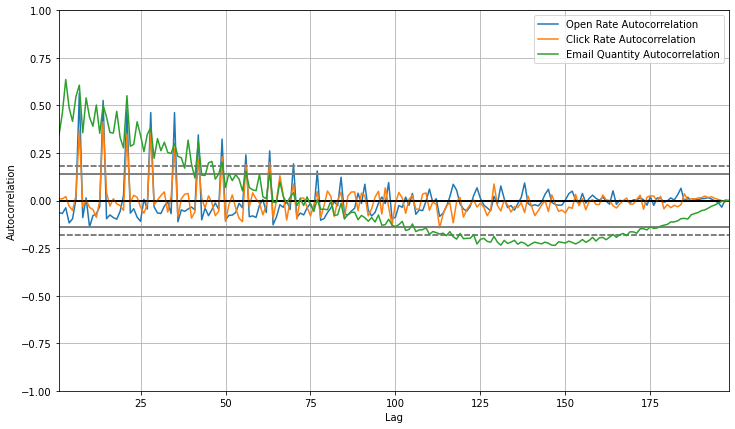

In [40]:
plt.figure(figsize=(12,7))
pd.plotting.autocorrelation_plot(metrics.openRate,label='Open Rate Autocorrelation')
pd.plotting.autocorrelation_plot(metrics.clickRate,label='Click Rate Autocorrelation')
pd.plotting.autocorrelation_plot(metrics.dailyQuant,label='Email Quantity Autocorrelation')
plt.legend();

In [41]:
data_first_order_diff = metrics[metrics.columns].diff()
data_first_order_diff['scaledDailyQuant'] = data_first_order_diff['dailyQuant'] / 100000

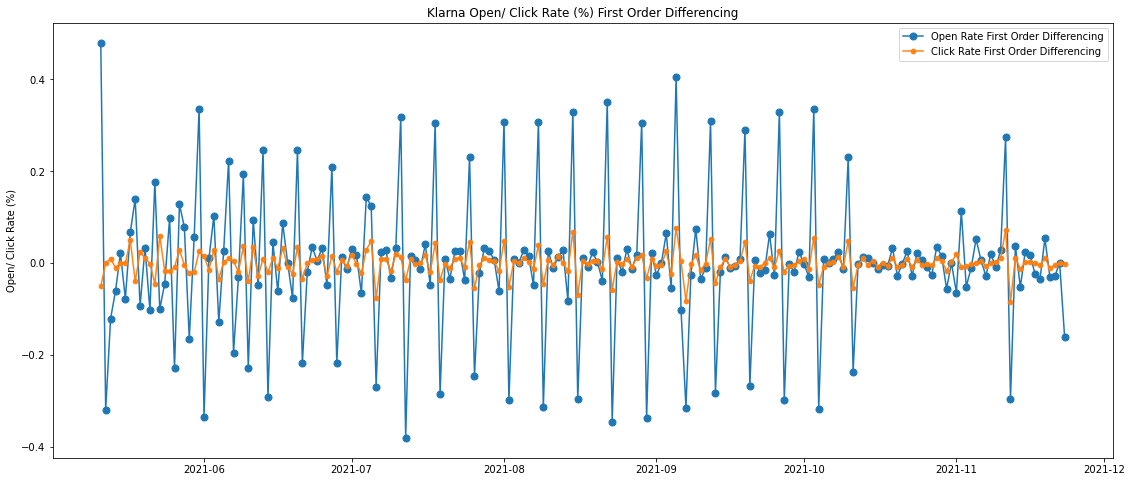

In [42]:
start, end = str(data_first_order_diff.index[0]), str(data_first_order_diff.index[-1])

fig, ax = plt.subplots(figsize=(19, 8))

ax.plot(data_first_order_diff.loc[start:end, 'openRate'],
marker='o', markersize=7, linestyle='-', label='Open Rate First Order Differencing')


ax.plot(data_first_order_diff.loc[start:end, 'clickRate'],
marker='o', alpha=.95,markersize=4.7, linestyle='-', label='Click Rate First Order Differencing')



ax.set_ylabel('Open/ Click Rate (%)')
ax.set_title('Klarna Open/ Click Rate (%) First Order Differencing')
ax.legend();

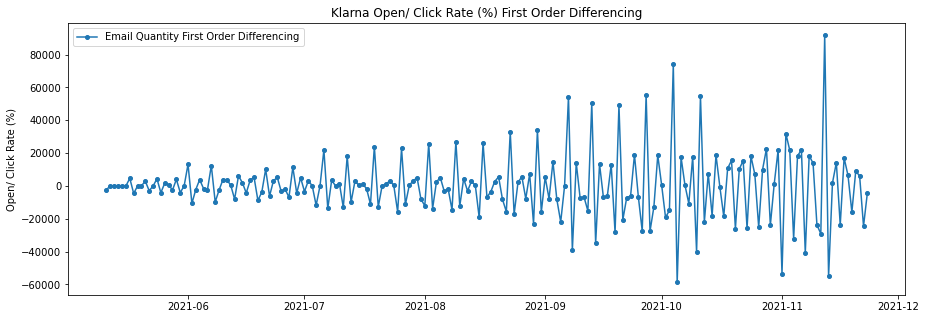

In [43]:
start, end = str(data_first_order_diff.index[0]), str(data_first_order_diff.index[-1])

fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(data_first_order_diff.loc[start:end, 'dailyQuant'],
marker='o', markersize=4, linestyle='-', label='Email Quantity First Order Differencing')

ax.set_ylabel('Open/ Click Rate (%)')
ax.set_title('Klarna Open/ Click Rate (%) First Order Differencing')
ax.legend();

In [44]:
metrics['day'] = metrics.index.day
metrics['Month'] = metrics.index.month
metrics['Weekday_Name'] = metrics.index.dayofweek
metrics = metrics.replace({'Weekday_Name': {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}})
metrics

,date,openRate,clickRate,dailyQuant,day,Month,Weekday_Name
date,,,,,,,
2021-05-10,2021-05-10,0.305643,0.050113,2215,10,5,Monday
2021-05-11,2021-05-11,0.785714,0.000000,14,11,5,Tuesday
2021-05-12,2021-05-12,0.466667,0.000000,15,12,5,Wednesday
2021-05-13,2021-05-13,0.346154,0.009615,104,13,5,Thursday
2021-05-14,2021-05-14,0.285714,0.000000,49,14,5,Friday
...,...,...,...,...,...,...,...
2021-11-19,2021-11-19,0.391614,0.021556,37205,19,11,Friday
2021-11-20,2021-11-20,0.362489,0.011155,46349,20,11,Saturday
2021-11-21,2021-11-21,0.333722,0.006457,52346,21,11,Sunday


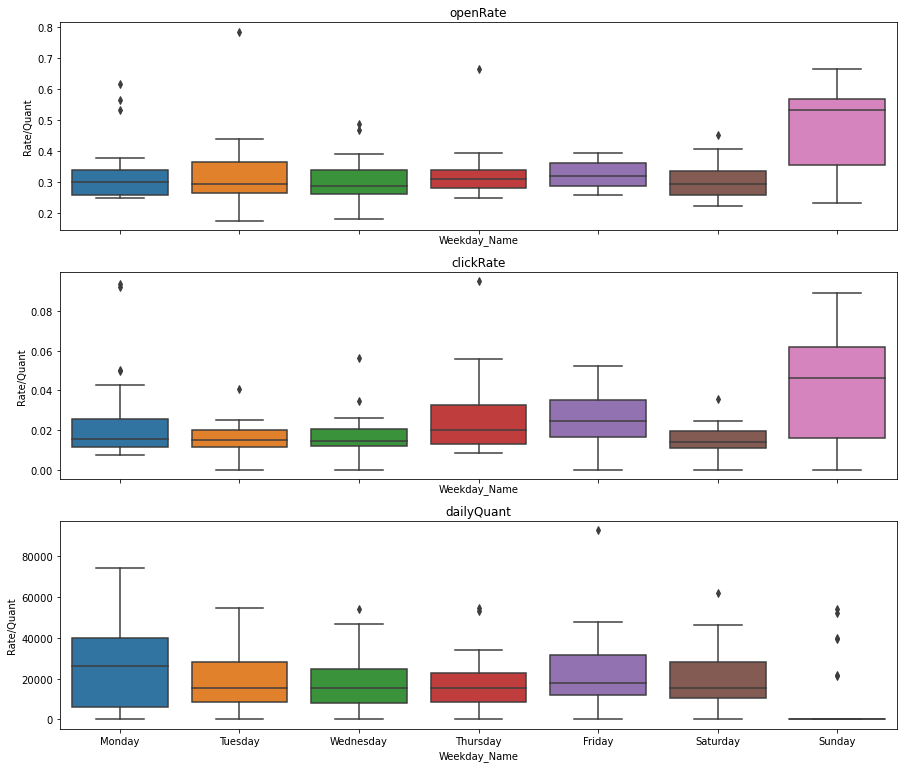

In [45]:
fig, axes = plt.subplots(3, 1, figsize=(15, 13),sharex=True)
for name, ax in zip(['openRate', 'clickRate', 'dailyQuant'], axes):
    sns.boxplot(data=metrics, x='Weekday_Name', y=name, ax=ax)
    ax.set_ylabel('Rate/Quant')
    ax.set_title(name)

In [46]:
metrics

,date,openRate,clickRate,dailyQuant,day,Month,Weekday_Name
date,,,,,,,
2021-05-10,2021-05-10,0.305643,0.050113,2215,10,5,Monday
2021-05-11,2021-05-11,0.785714,0.000000,14,11,5,Tuesday
2021-05-12,2021-05-12,0.466667,0.000000,15,12,5,Wednesday
2021-05-13,2021-05-13,0.346154,0.009615,104,13,5,Thursday
2021-05-14,2021-05-14,0.285714,0.000000,49,14,5,Friday
...,...,...,...,...,...,...,...
2021-11-19,2021-11-19,0.391614,0.021556,37205,19,11,Friday
2021-11-20,2021-11-20,0.362489,0.011155,46349,20,11,Saturday
2021-11-21,2021-11-21,0.333722,0.006457,52346,21,11,Sunday


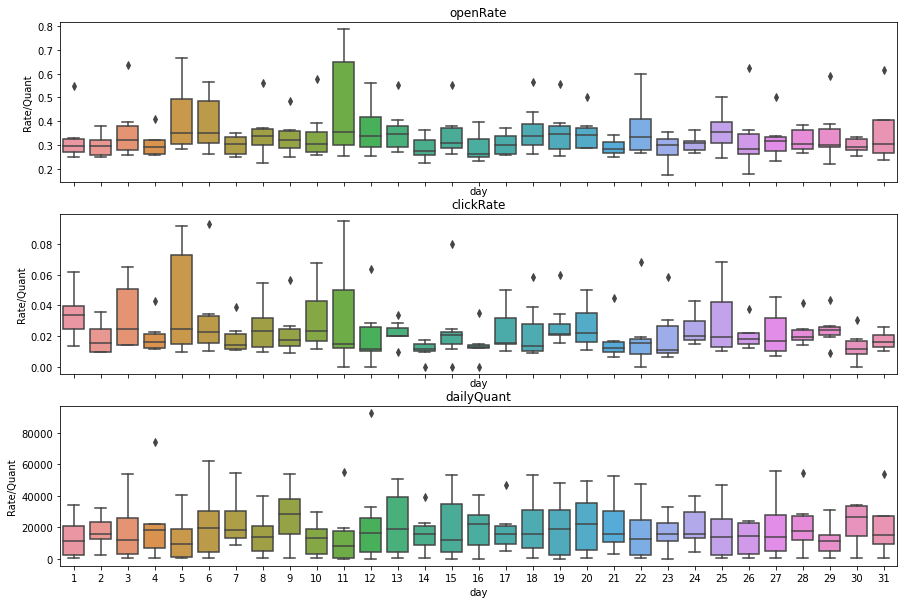

In [47]:
fig, axes = plt.subplots(3, 1, figsize=(15, 10),sharex=True)
for name, ax in zip(['openRate', 'clickRate', 'dailyQuant'], axes):
    sns.boxplot(data=metrics, x='day', y=name, ax=ax)
    ax.set_ylabel('Rate/Quant')
    ax.set_title(name)

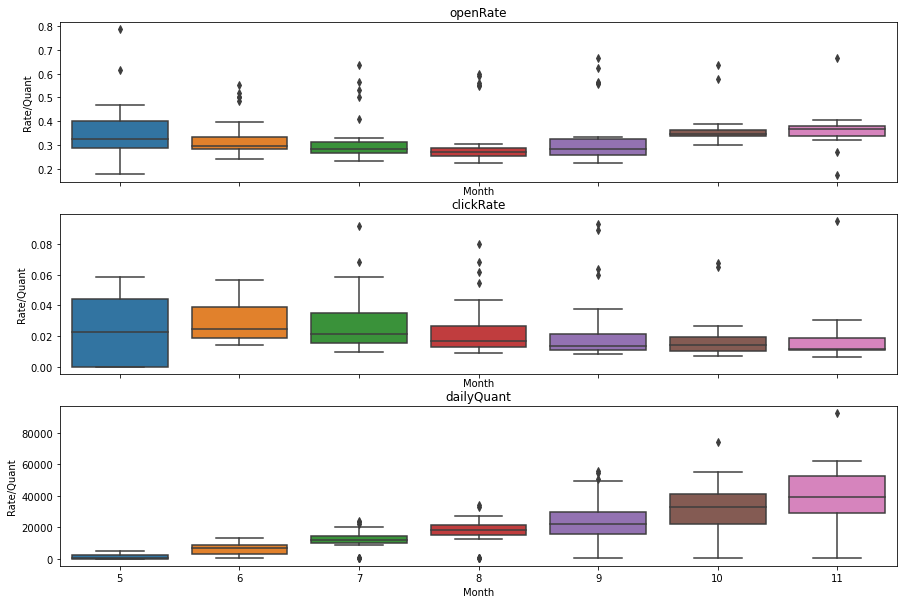

In [48]:
fig, axes = plt.subplots(3, 1, figsize=(15, 10),sharex=True)
for name, ax in zip(['openRate', 'clickRate', 'dailyQuant'], axes):
    sns.boxplot(data=metrics, x='Month', y=name, ax=ax)
    ax.set_ylabel('Rate/Quant')
    ax.set_title(name)

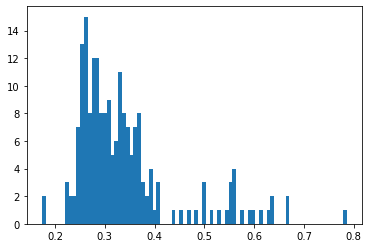

In [49]:
plt.hist(metrics.openRate,bins=80)
plt.show()

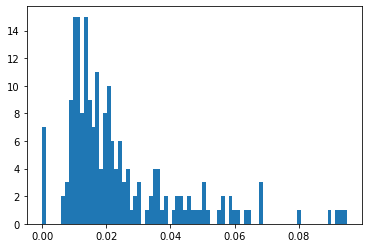

In [50]:
plt.hist(metrics.clickRate,bins=80)
plt.show()

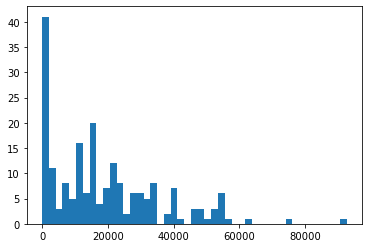

In [51]:
plt.hist(metrics.dailyQuant,bins=45)
plt.show()

<AxesSubplot:title={'center':'Klarna Open Rate'}, xlabel='date', ylabel='openRate'>

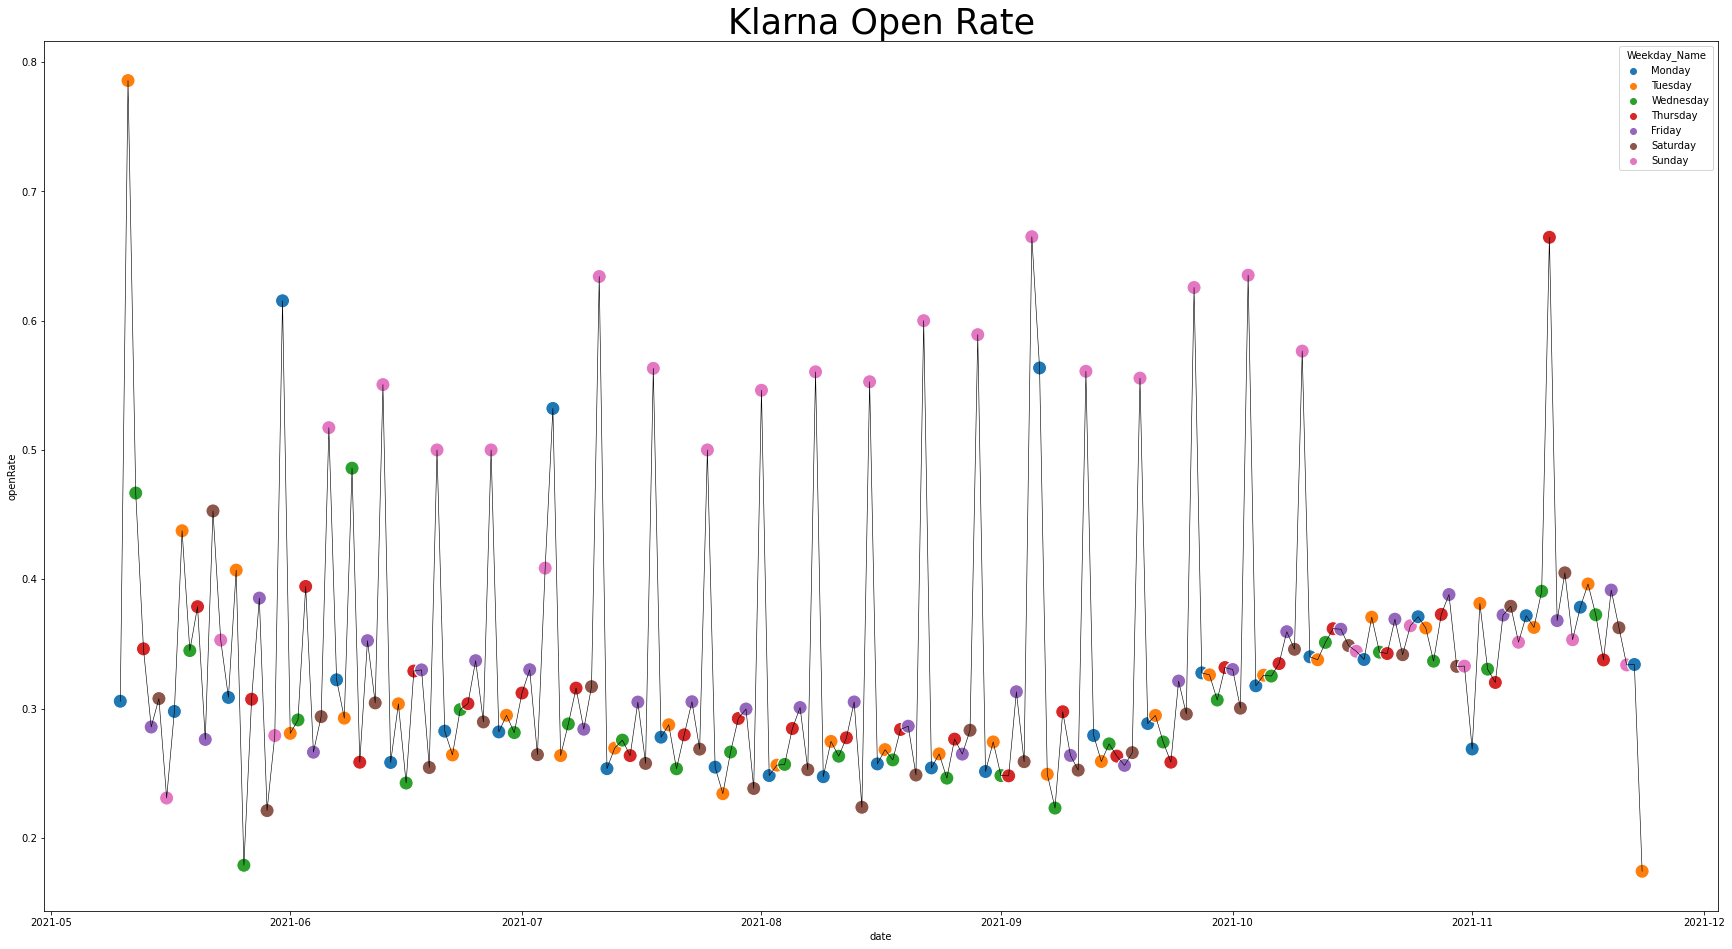

In [52]:
plt.figure(figsize=(30,16))
plt.plot(metrics.openRate, linewidth=.6,c='black')
plt.title('Klarna Open Rate',fontsize = 35)
sns.scatterplot(data=metrics, x='date', y='openRate', hue='Weekday_Name',s=200)

<AxesSubplot:title={'center':'Klarna Click Rate'}, xlabel='date', ylabel='clickRate'>

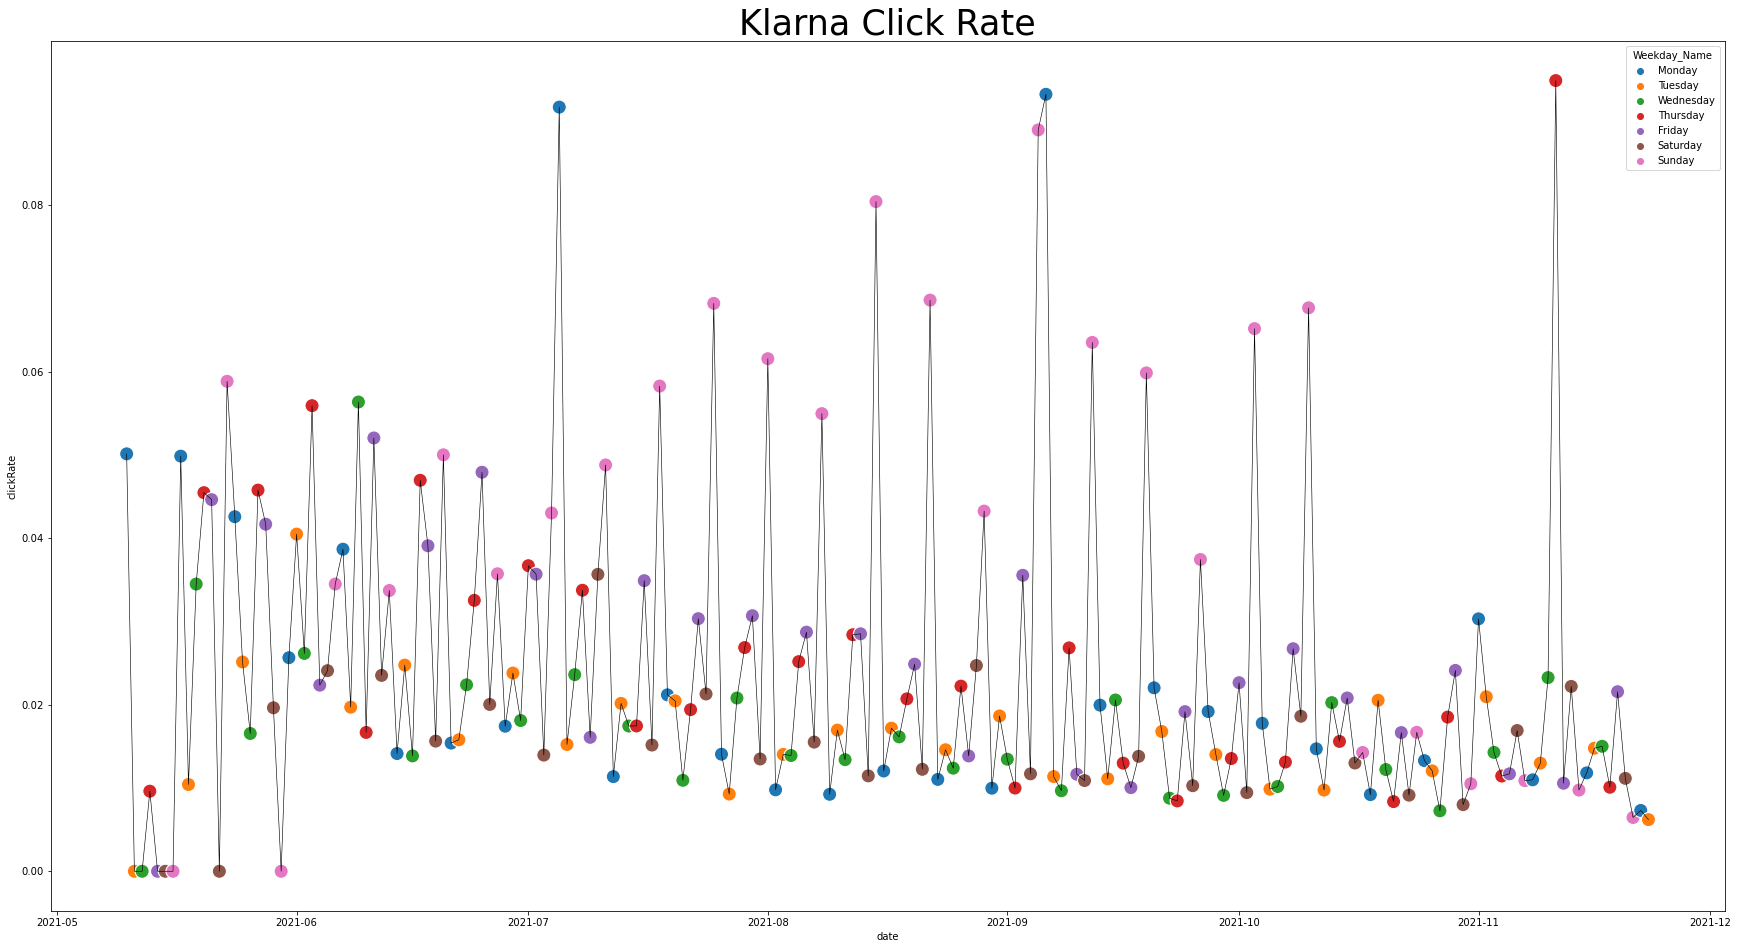

In [53]:
plt.figure(figsize=(30,16))
plt.plot(metrics.clickRate, linewidth=.6,c='black')
plt.title('Klarna Click Rate',fontsize = 35)
sns.scatterplot(data=metrics, x='date', y='clickRate', hue='Weekday_Name',s=200)

<AxesSubplot:title={'center':'Klarna Email Quantities'}, xlabel='date', ylabel='dailyQuant'>

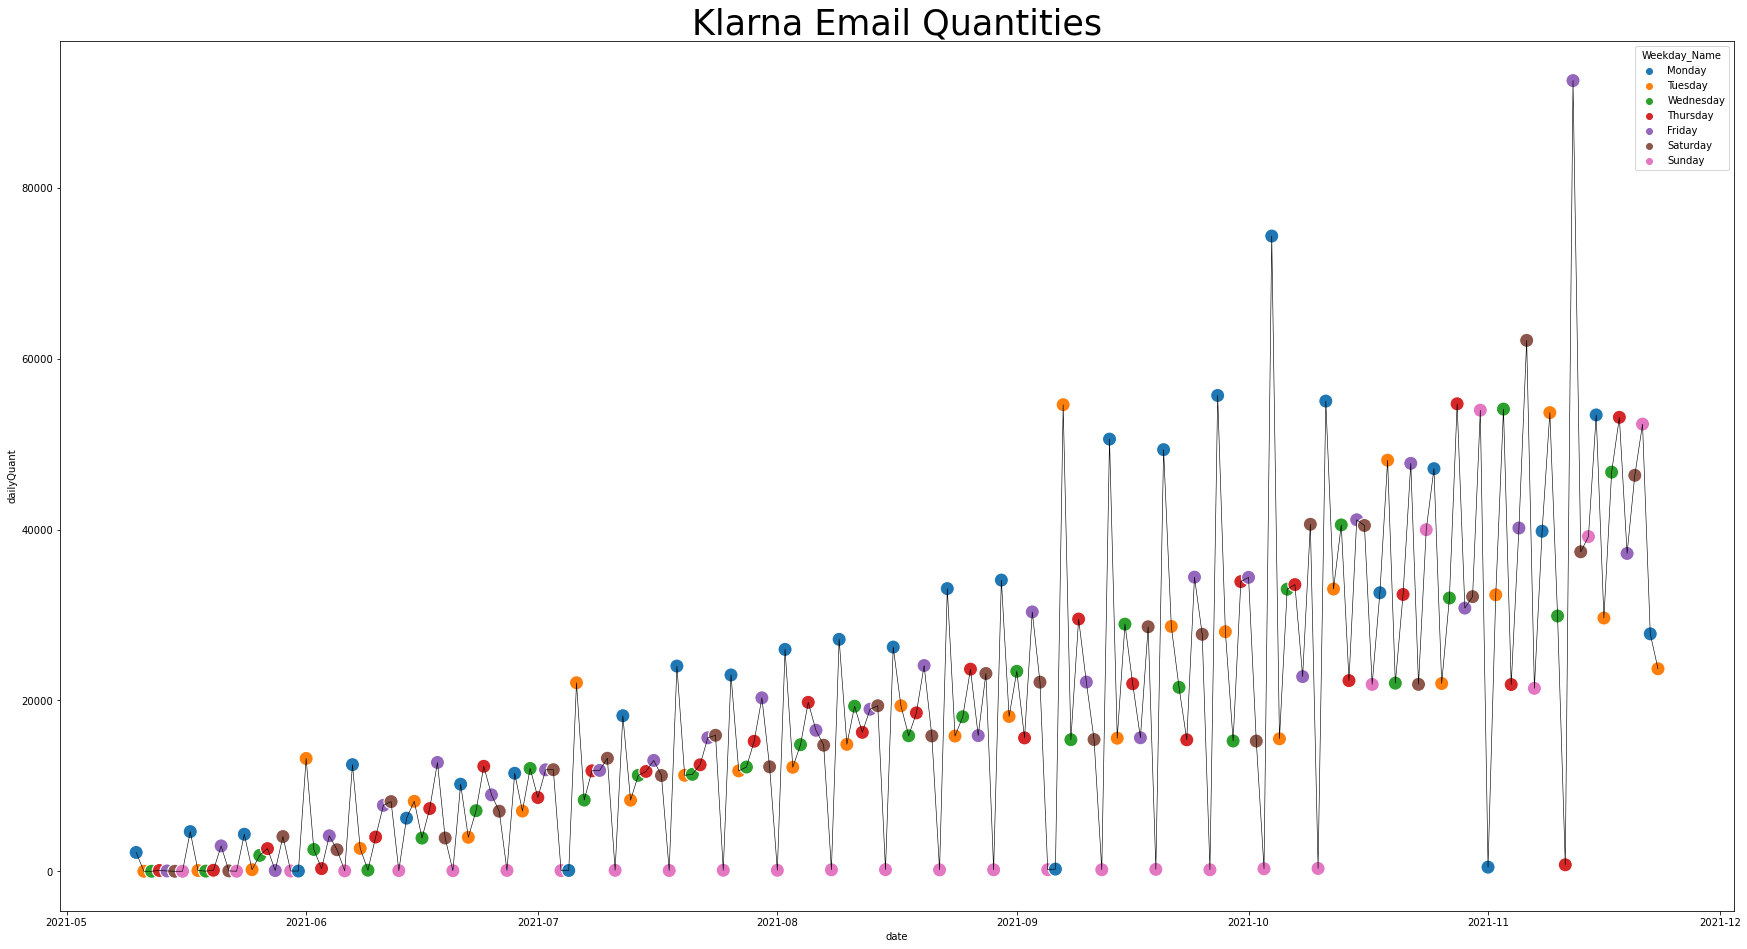

In [54]:
plt.figure(figsize=(30,16))
plt.plot(metrics.dailyQuant, linewidth=.6,c='black')
plt.title('Klarna Email Quantities',fontsize = 35)
sns.scatterplot(data=metrics, x='date', y='dailyQuant', hue='Weekday_Name',s=200)